# Binterview

Objective #1
- Tell us the conversion rate of Pilot Opportunities to Annual Opportunities
  - On the opportunity object, there is a unique id that connects pilots opportunities to annuals
  - Annuals are defined as Type = Bulk
  - Pilots and Annuals are related upon the pilot being won
- What is the likelihood that an annual will be won when creating a pilot?
- What is the likelihood that an annual will be won when winning a pilot?

Objective #2
- Of all the sessions requested how many are sold?
  - All Opportunities have a Session Request and all Session Requests that are Accepted are associated with the Session Record
- What requested Research Product is most likely to be sold? Explain how you came to that conclusion.
  - Sessions have Service Requests Records related to them, these records are the Products that are being requested by the sales team and relate back to the Product in our Product Catalog.

Objective #3
- What is the average Booking value of Opportunities with sessions sold since July?

## Imports

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as datetime

#SQL
import mysql.connector
import os

In [2]:
# Import Salesforce data
contracts_df = pd.read_csv('contracts.csv')
opps_df = pd.read_csv('Opps Table (July to present).csv')
product_df = pd.read_csv('Product Table.csv')
project_df = pd.read_csv('project_request__cs.csv')
RProject_df = pd.read_csv('remesh_project__cs.csv')
service_df = pd.read_csv('service_request__cs.csv')
SessionRequest_df = pd.read_csv('Session Request Table.csv')
session_cs_df = pd.read_csv('session__cs.csv')
SessionProduct_df = pd.read_csv('session_product__cs.csv')

### Contracts <br />
DB Name: contracts_df <br />
File Name: contracts.csv <br />
1367 entries <br />

In [3]:
contracts_df.head()

,Id,AccountId,Pricebook2Id,OwnerExpirationNotice,StartDate,EndDate,BillingStreet,BillingCity,BillingState,BillingPostalCode,...,Invoiced_In_Arrears_Balance_Amount__c,Originating_Opportunity__c,PO_Number__c,Payment_Frequency__c,Payment_Terms__c,Customer_Success_Rep__c,Billing_Contact__c,Logo__c,First_Conversation_Date__c,Last_Conversation_Date__c
0,8002M000000Vrn9QAC,0014100000byjMrAAI,01s41000006ojbeAAA,NaN,2020-08-04,2020-10-03,NaN,NaN,NaN,NaN,...,NaN,0062M00000ku5usQAA,NaN,Custom / In Arrears,Net 45,0052M000008PvAJQA0,0032M00002ftK1SQAU,a0Y2M00000R48KgUAJ,2020-08-06,2020-08-18
1,8002M000000VrptQAC,0014100000bD20nAAC,01s41000006ojbeAAA,NaN,2020-08-06,2020-11-05,NaN,NaN,NaN,NaN,...,NaN,0062M00000jwUoPQAU,NaN,100% Upfront,Net 60,NaN,0034100002DqUdlAAF,a0Y2M00000R48G4UAJ,2020-08-14,2020-08-14
2,8002M000000VrqxQAC,0014100000GF56vAAD,01s41000006ojbeAAA,NaN,2020-08-05,2020-10-04,NaN,NaN,NaN,NaN,...,NaN,0062M00000ku2gLQAQ,NaN,Custom / In Arrears,Net 45,005410000060ULBAA2,0032M00002fDLn2QAG,a0Y2M00000R48KxUAJ,NaN,NaN
3,8002M000000VruGQAS,0014100000GF56vAAD,01s41000006ojbeAAA,NaN,2020-08-07,2020-10-06,NaN,NaN,NaN,NaN,...,NaN,0062M00000ku649QAA,NaN,Custom / In Arrears,Net 30,005410000060ULBAA2,0032M00002fDLn2QAG,a0Y2M00000R48KxUAJ,NaN,NaN
4,8002M000000VsWkQAK,0012M00002KRHt4QAH,01s41000006ojbeAAA,NaN,2020-08-14,2021-08-13,NaN,NaN,NaN,NaN,...,NaN,0062M00000jOGdNQAW,NaN,100% Upfront,Net 30,0052M000008zHZkQAM,0032M00002wbP4uQAE,a0Y2M00000R44TqUAJ,2020-09-02,2020-09-16


In [4]:
contracts_df['StartDate'] = pd.to_datetime(contracts_df['StartDate'])
contracts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Id                                     1367 non-null   object        
 1   AccountId                              1367 non-null   object        
 2   Pricebook2Id                           1367 non-null   object        
 3   OwnerExpirationNotice                  0 non-null      float64       
 4   StartDate                              1367 non-null   datetime64[ns]
 5   EndDate                                1367 non-null   object        
 6   BillingStreet                          0 non-null      float64       
 7   BillingCity                            0 non-null      float64       
 8   BillingState                           0 non-null      float64       
 9   BillingPostalCode                      0 non-null      float64 

### Opportunities <br />
DB Name: opps_df <br />
File Name: Opps Table (July to present).csv <br />
721 entries <br />

In [5]:
opps_df.Id.describe()

count                    721
unique                   721
top       0062M00000kvskUQAQ
freq                       1
Name: Id, dtype: object

In [6]:
for col in opps_df.columns: 
    print(col)

Id
IsDeleted
AccountId
RecordTypeId
IsPrivate
StageName
Amount
Probability
ExpectedRevenue
TotalOpportunityQuantity
CloseDate
Type
LeadSource
IsClosed
IsWon
ForecastCategory
ForecastCategoryName
CampaignId
Pricebook2Id
OwnerId
CreatedDate
CreatedById
LastModifiedDate
LastModifiedById
SystemModstamp
LastActivityDate
FiscalQuarter
FiscalYear
Fiscal
ContactId
SyncedQuoteId
ContractId
HasOverdueTask
IqScore
Budget_Confirmed__c
Discovery_Completed__c
ROI_Analysis_Completed__c
Salesforce_Opportunity__c
Loss_Reason__c
Billing_Contact__c
Projects_on_this_opportunity__c
Confirmed_Session_Date_Time__c
PO_Number__c
PushCount__c
Meeting_or_Demo_Date__c
PM_Overseeing__c
Bid_Request__c
Recognized_Revenue_from_Projects__c
Preferred_Sample_Size__c
Request_for_a_CS_Manager__c
Lead_Id__c
Primary_Contact__c
Top_of_Funnel_Entry_Date__c
Support_needs__c
APM_or_Bulk__c
In_house_Services_Approved__c
Project_Manager__c
QB_Journal_Sync_Error__c
Invoice_sent__c
Cancellation_Fee__c
CS_Manager__c
Marketing_Source

### Products <br />
DB Name: product_df <br />
File Name: Product Table.csv <br />
128 entries <br />

In [7]:
product_df = pd.read_csv('Product Table.csv')
product_df.head()

,Product Name,Active (Product),Product 18 Chad Id,Product Description,Product Code,Product Type,Product Family,Sub-Family
0,Active Participant Minute,1,01t2M000005NAvEQAW,Price for a single Active Participant Minute--...,NaN,Revenue,Product,Platform
1,Discussion Guide,1,01t2M000005nonvQAA,Discussion Guide only,NaN,NaN,NaN,NaN
2,"Discussion Guide, Moderation",0,01t2M000005noo0QAA,"Discussion Guide, Moderation",NaN,NaN,NaN,NaN
3,"DG, Moderation, Topline Report",1,01t2M000005noo5QAA,"DG, Moderation, Topline Report",NaN,NaN,NaN,NaN
4,"DG, Moderation, Moderate Report",1,01t2M000005nooAQAQ,"DG, Moderation, Moderate Report",NaN,NaN,NaN,NaN


In [8]:
product_df.rename(columns={'Product 18 Chad Id':'Product__c'}, inplace=True)

In [9]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product Name         128 non-null    object
 1   Active (Product)     128 non-null    int64 
 2   Product__c           128 non-null    object
 3   Product Description  18 non-null     object
 4   Product Code         3 non-null      object
 5   Product Type         102 non-null    object
 6   Product Family       105 non-null    object
 7   Sub-Family           100 non-null    object
dtypes: int64(1), object(7)
memory usage: 8.1+ KB


In [10]:
#Make a copy of opps
product2_df = product_df.copy()
product2_df = product2_df[['Product__c','Product Name']]

### Project Requests <br />
DB Name: project_df <br />
File Name: project_request__cs.csv <br />
435 entries <br />

In [11]:
project_df.columns

Index(['Id', 'OwnerId', 'IsDeleted', 'CreatedDate', 'CreatedById',
       'LastModifiedDate', 'LastModifiedById', 'SystemModstamp',
       'LastActivityDate', 'Decision__c', 'Opportunity__c', 'Project__c',
       'Status__c'],
      dtype='object')

### Remesh Projects <br />
DB Name: RProject_df <br />
File Name: remesh_project__cs.csv <br />
1367 entries <br />

In [12]:
RProject_df.columns

Index(['Id', 'OwnerId', 'IsDeleted', 'Name', 'CreatedDate', 'CreatedById',
       'LastModifiedDate', 'LastModifiedById', 'SystemModstamp',
       'LastActivityDate', 'Account__c', 'Contract__c', 'Project_Request__c',
       'Project_Title__c', 'Quotas__c', 'Status__c', 'TEMP_Old_Project_Id__c',
       'TEMP_Migrate__c'],
      dtype='object')

### Service Request <br />
DB Name: service_df <br />
File Name: service_request__cs.csv <br />
1411 entries <br />

In [13]:
service_df.head()

,Id,OwnerId,IsDeleted,Name,CreatedDate,CreatedById,LastModifiedDate,LastModifiedById,SystemModstamp,LastActivityDate,Decision__c,Opportunity__c,Product__c,Project_Request__c,Session_Product__c,Session_Request__c,Total_Price_Override__c,Re_calculate_totals_on_session__c,Status__c,Previous_Booked_Amount__c
0,a3R2M000000VUwjUAG,0052M000008zLmjQAE,False,RP-691,2020-08-03T12:22:35.000+0000,00541000007VOCUAA4,2020-08-03T13:49:49.000+0000,0052M000008zLmjQAE,2020-08-03T13:49:49.000+0000,NaN,NaN,0062M00000ktyYUQAY,01t2M000008JOtJQAW,a1J2M00000Tc4kcUAB,NaN,a3V2M000000UJzAUAW,NaN,False,NaN,NaN
1,a3R2M000000VUwkUAG,0052M000008zLmjQAE,False,RP-692,2020-08-03T12:22:35.000+0000,00541000007VOCUAA4,2020-08-03T13:49:49.000+0000,0052M000008zLmjQAE,2020-08-03T13:49:49.000+0000,NaN,NaN,0062M00000ktyYUQAY,01t2M000008JOtKQAW,a1J2M00000Tc4kcUAB,NaN,a3V2M000000UJzAUAW,NaN,False,NaN,NaN
2,a3R2M000000VUwtUAG,0052M000008Pn2cQAC,False,RP-693,2020-08-03T14:46:45.000+0000,00541000007VOCUAA4,2020-08-03T15:33:26.000+0000,0052M000008Pn2cQAC,2020-08-03T15:33:26.000+0000,NaN,NaN,0062M00000ktyz2QAA,01t2M000008JOtJQAW,a1J2M00000Tc4sWUAR,NaN,a3V2M000000UJzjUAG,NaN,False,NaN,NaN
3,a3R2M000000VUwuUAG,0052M000008Pn2cQAC,False,RP-694,2020-08-03T14:46:45.000+0000,00541000007VOCUAA4,2020-08-03T15:33:26.000+0000,0052M000008Pn2cQAC,2020-08-03T15:33:26.000+0000,NaN,NaN,0062M00000ktyz2QAA,01t2M000008JOtKQAW,a1J2M00000Tc4sWUAR,NaN,a3V2M000000UJzjUAG,NaN,False,NaN,NaN
4,a3R2M000000VUwyUAG,0052M000008yKCRQA2,False,RP-695,2020-08-03T16:37:30.000+0000,00541000003qyb7AAA,2020-08-03T19:02:10.000+0000,0052M000008yKCRQA2,2020-08-03T19:02:10.000+0000,NaN,NaN,0062M00000ktzHfQAI,01t2M000008JOtKQAW,a1J2M00000Tc4vyUAB,NaN,a3V2M000000UK0SUAW,NaN,False,NaN,NaN


### Session Request <br />
DB Name: SessionRequest_df <br />
File Name: Session Request Table.csv <br />
859 entries <br />

In [14]:
SessionRequest_df.columns

Index(['Id', 'IsDeleted', 'Name', 'CreatedDate', 'CreatedById',
       'LastModifiedDate', 'LastModifiedById', 'SystemModstamp',
       'LastActivityDate', 'Project_Request__c', 'Confirmed_Start_Time__c',
       'Country__c', 'Decision__c', 'Estimated_Date_Time__c', 'N__c',
       'Opportunity__c', 'Platform_Type__c', 'Selected_Pricing_Option__c',
       'Session_Length_Minutes__c', 'Session__c', 'Total_Price__c',
       'Total_Cost__c'],
      dtype='object')

### Sessions <br />
DB Name: session_cs_df <br />
File Name: session__cs.csv <br />
592 entries <br />

In [15]:
session_cs_df.columns

Index(['Id', 'OwnerId', 'IsDeleted', 'Name', 'CreatedDate', 'CreatedById',
       'LastModifiedDate', 'LastModifiedById', 'SystemModstamp', 'Start Month',
       'Confirmed_Start_Time__c', 'Conversation__c', 'N__c', 'Notes__c',
       'Platform__c', 'Project__c', 'Remesh_Conversation_Id__c',
       'Session_Details__c', 'Session_Length_Minutes__c', 'Session_Request__c',
       'Session_Title__c', 'Status__c', 'Use_Case_Bucket__c',
       'Use_Case_Detail__c', 'Non_Traditional_Vendor_Used__c',
       'Traditional_Vendor_Used__c', 'Session_Price__c', 'Session_Cost__c',
       'Cancellation_Date__c', 'Country__c'],
      dtype='object')

### Session Products <br />
DB Name: SessionProduct_df <br />
File Name: session_product__cs.csv <br />
3145 entries <br />

In [16]:
SessionProduct_df.columns

Index(['Id', 'OwnerId', 'IsDeleted', 'Name', 'CreatedDate', 'CreatedById',
       'LastModifiedDate', 'LastModifiedById', 'SystemModstamp',
       'LastActivityDate', 'Notes__c', 'Order_Product__c', 'Product__c',
       'Quantity__c', 'Remesh_Project__c', 'Service_Request__c', 'Session__c',
       'Total_Price_Override__c', 'TEMP_Project_Product__c', 'Status__c'],
      dtype='object')

In [17]:
SessionProduct_df.head()

,Id,OwnerId,IsDeleted,Name,CreatedDate,CreatedById,LastModifiedDate,LastModifiedById,SystemModstamp,LastActivityDate,Notes__c,Order_Product__c,Product__c,Quantity__c,Remesh_Project__c,Service_Request__c,Session__c,Total_Price_Override__c,TEMP_Project_Product__c,Status__c
0,a3U2M000000V5qCUAS,0052M000008PvAJQA0,False,SP-4242,2020-08-03T13:16:18.000+0000,0052M000008PvAJQA0,2020-08-25T02:12:14.000+0000,0052M0000091zSnQAI,2020-09-17T19:37:54.000+0000,NaN,NaN,8022M00000E6fIKQAZ,01t2M000008JOuUQAW,1.0,a3P2M0000019UKVUA2,NaN,a3W2M000000W9YnUAK,0.0,NaN,NaN
1,a3U2M000000V5qMUAS,0052M000008PvAJQA0,False,SP-4243,2020-08-03T17:11:04.000+0000,0052M000008PvAJQA0,2020-08-11T16:43:03.000+0000,0052M0000091zSnQAI,2020-09-17T19:37:54.000+0000,NaN,NaN,8022M00000E6ZPVQA3,01t2M000008JOuUQAW,1.0,a3P2M000000tvUTUAY,NaN,a3W2M000000W9ZlUAK,0.0,NaN,NaN
2,a3U2M000000V5qRUAS,0054100000605WDAAY,False,SP-4244,2020-08-03T17:46:11.000+0000,0054100000605WDAAY,2020-08-27T21:20:35.000+0000,0052M0000091zSnQAI,2020-09-17T19:37:54.000+0000,NaN,NaN,8022M00000E6gJGQAZ,01t2M000008JOuUQAW,1.0,a3P2M0000019UONUA2,NaN,a3W2M000000W9a0UAC,NaN,NaN,NaN
3,a3U2M000000V5qWUAS,0054100000605WDAAY,False,SP-4245,2020-08-03T17:46:26.000+0000,0054100000605WDAAY,2020-08-28T19:00:19.000+0000,0052M0000091zSnQAI,2020-09-17T19:37:54.000+0000,NaN,NaN,8022M00000E6geRQAR,01t2M000008JOuUQAW,1.0,a3P2M0000019UOSUA2,NaN,a3W2M000000W9a5UAC,NaN,NaN,NaN
4,a3U2M000000V5qbUAC,0054100000605WDAAY,False,SP-4246,2020-08-03T17:46:42.000+0000,0054100000605WDAAY,2020-08-28T18:59:43.000+0000,0052M0000091zSnQAI,2020-09-17T19:37:54.000+0000,NaN,NaN,8022M00000E6geMQAR,01t2M000008JOuUQAW,1.0,a3P2M0000019UOXUA2,NaN,a3W2M000000W9aAUAS,NaN,NaN,NaN


In [18]:
SessionProduct_df.Product__c.value_counts()

01t2M000008JOuUQAW    1896
01t2M000008JOtKQAW     885
01t2M000008JOuZQAW      82
01t2M000005NAvEQAW      74
01t2M000008JOuWQAW      54
01t2M000008JOtHQAW      37
01t2M000008JOtGQAW      34
01t2M000008JOtIQAW      27
01t2M000008JOtJQAW      17
01t2M000008JOuaQAG      11
01t2M000006SLUHQA4       7
01t2M000008JOuPQAW       6
01t2M00000CwiXOQAZ       4
01t2M00000CwiXXQAZ       2
01t2M000008JOtRQAW       2
01t2M000008JOuQQAW       1
01t2M000008JOuNQAW       1
01t2M000005noo5QAA       1
01t2M000008JOtFQAW       1
01t4100000417pmAAA       1
01t2M000008JOuMQAW       1
Name: Product__c, dtype: int64

## EDA

In [19]:
contracts_df.head()

,Id,AccountId,Pricebook2Id,OwnerExpirationNotice,StartDate,EndDate,BillingStreet,BillingCity,BillingState,BillingPostalCode,...,Invoiced_In_Arrears_Balance_Amount__c,Originating_Opportunity__c,PO_Number__c,Payment_Frequency__c,Payment_Terms__c,Customer_Success_Rep__c,Billing_Contact__c,Logo__c,First_Conversation_Date__c,Last_Conversation_Date__c
0,8002M000000Vrn9QAC,0014100000byjMrAAI,01s41000006ojbeAAA,NaN,2020-08-04,2020-10-03,NaN,NaN,NaN,NaN,...,NaN,0062M00000ku5usQAA,NaN,Custom / In Arrears,Net 45,0052M000008PvAJQA0,0032M00002ftK1SQAU,a0Y2M00000R48KgUAJ,2020-08-06,2020-08-18
1,8002M000000VrptQAC,0014100000bD20nAAC,01s41000006ojbeAAA,NaN,2020-08-06,2020-11-05,NaN,NaN,NaN,NaN,...,NaN,0062M00000jwUoPQAU,NaN,100% Upfront,Net 60,NaN,0034100002DqUdlAAF,a0Y2M00000R48G4UAJ,2020-08-14,2020-08-14
2,8002M000000VrqxQAC,0014100000GF56vAAD,01s41000006ojbeAAA,NaN,2020-08-05,2020-10-04,NaN,NaN,NaN,NaN,...,NaN,0062M00000ku2gLQAQ,NaN,Custom / In Arrears,Net 45,005410000060ULBAA2,0032M00002fDLn2QAG,a0Y2M00000R48KxUAJ,NaN,NaN
3,8002M000000VruGQAS,0014100000GF56vAAD,01s41000006ojbeAAA,NaN,2020-08-07,2020-10-06,NaN,NaN,NaN,NaN,...,NaN,0062M00000ku649QAA,NaN,Custom / In Arrears,Net 30,005410000060ULBAA2,0032M00002fDLn2QAG,a0Y2M00000R48KxUAJ,NaN,NaN
4,8002M000000VsWkQAK,0012M00002KRHt4QAH,01s41000006ojbeAAA,NaN,2020-08-14,2021-08-13,NaN,NaN,NaN,NaN,...,NaN,0062M00000jOGdNQAW,NaN,100% Upfront,Net 30,0052M000008zHZkQAM,0032M00002wbP4uQAE,a0Y2M00000R44TqUAJ,2020-09-02,2020-09-16


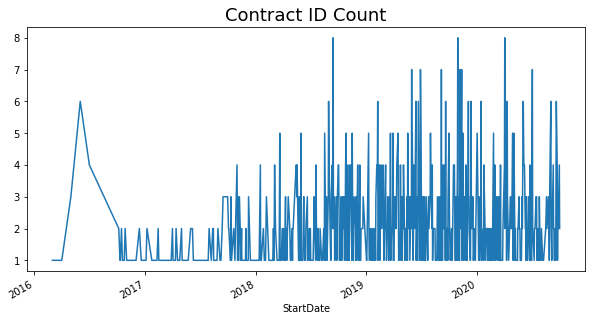

In [20]:
contracts_df.groupby(['StartDate'])['Id'].count().plot(kind='line',figsize = (10,5))
plt.title("Contract ID Count", size= 18)
plt.show()

Text(0, 0.5, 'ID Count')

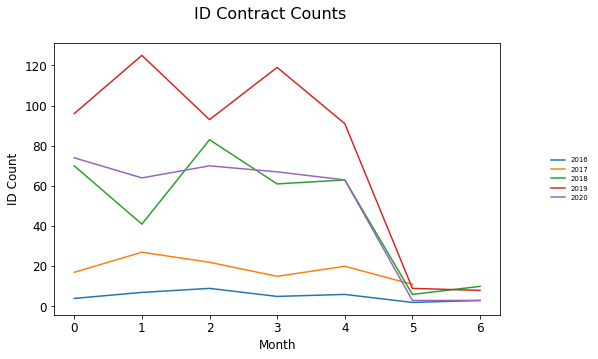

In [21]:
(contracts_df.groupby([contracts_df['StartDate'].dt.weekday,\
                       contracts_df['StartDate'].dt.year])\
 ['Id'].count()).unstack().plot(kind='line', figsize=(8,5))

plt.legend(loc='center left', bbox_to_anchor=(1.1, .5), fontsize='x-small', frameon=False)
plt.suptitle('ID Contract Counts', fontsize=16)
plt.tick_params(labelsize = 12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('ID Count', fontsize=12)

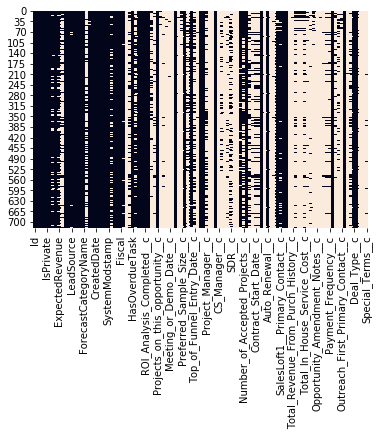

In [22]:
sns.heatmap(opps_df.isnull(), cbar=False)

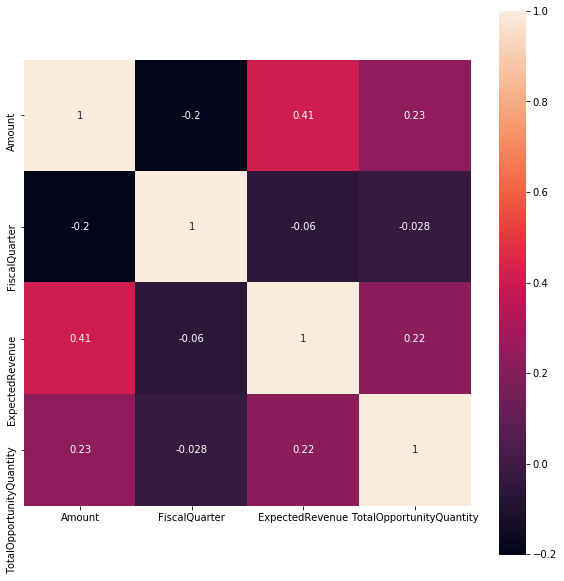

In [59]:
corrmat = opps_df[['StageName','Amount','FiscalQuarter','ExpectedRevenue','TotalOpportunityQuantity'\
             ]].corr()
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrmat,square=True,annot=True)

# Objectives

## Objective #1

- Tell us the conversion rate of Pilot Opportunities to Annual Opportunities
  - On the opportunity object, there is a unique id that connects pilots opportunities to annuals
  - Annuals are defined as Type = Bulk
  - Pilots and Annuals are related upon the pilot being won
- What is the likelihood that an annual will be won when creating a pilot?
- What is the likelihood that an annual will be won when winning a pilot?

In [24]:
opps_df.IsWon.value_counts()

False    579
True     142
Name: IsWon, dtype: int64

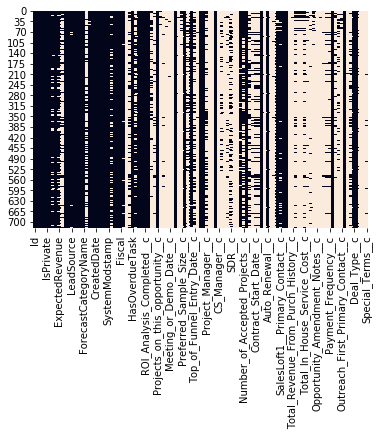

In [25]:
sns.heatmap(opps_df.isnull(), cbar=False)

In [26]:
#Make a copy of opps
pilot_df = opps_df.copy()
pilot_df = pilot_df[['Id','StageName','Amount', 'IsWon','Pilot__c','Annual_Opportunity__c',\
         'Deal_Type__c', 'Pilot_Opportunity__c','Is_Pilot__c']]

#Rename Bulk
pilot_df.loc[pilot_df['Deal_Type__c'] =='Bulk', 'Deal_Type__c']= 'Annual'
pilot_df.shape

(721, 9)

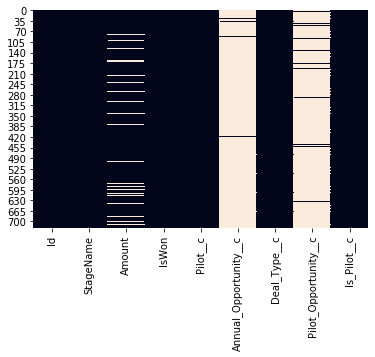

In [27]:
sns.heatmap(pilot_df.isnull(), cbar=False)

Text(0, 0.5, 'Opportunity Count')

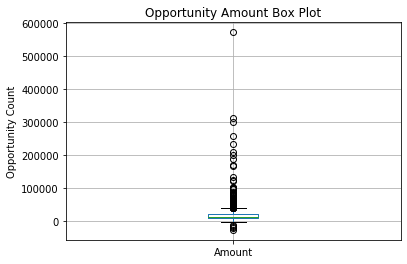

In [28]:
ax = opps_df.boxplot('Amount')
plt.title("Opportunity Amount Box Plot", size= 12)
# ax.set_xlabel("Amount (USD)")
ax.set_ylabel("Opportunity Count")

Text(0, 0.5, 'Opportunity Count')

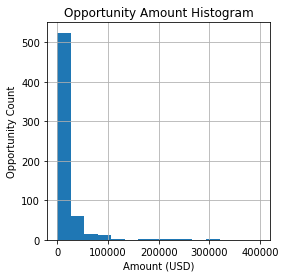

In [29]:
ax=opps_df['Amount'].hist(bins=15,figsize=(4,4),range=[0,400000])
plt.title("Opportunity Amount Histogram", size= 12)
ax.set_xlabel("Amount (USD)")
ax.set_ylabel("Opportunity Count")

In [30]:
pilot_df.Pilot_Opportunity__c.value_counts()

0062M00000jwMSgQAM    2
0062M00000kurbkQAA    2
0062M00000kv4SpQAI    1
0062M00000jR7tDQAS    1
0062M00000kcinCQAQ    1
0062M00000kug3wQAA    1
0062M00000kbzEtQAI    1
0062M00000kuje4QAA    1
0062M00000ilS6EQAU    1
0062M00000jhDaIQAU    1
0062M00000jwUoPQAU    1
0062M00000kcVyHQAU    1
0062M00000jhQSaQAM    1
0062M00000iHqsfQAC    1
0062M00000kceWnQAI    1
0062M00000kvnAjQAI    1
0062M00000kvHJlQAM    1
0062M00000jitKIQAY    1
0062M00000kv9AUQAY    1
0062M00000kcRgLQAU    1
0062M00000iI3BRQA0    1
0062M00000kdff1QAA    1
0062M00000kvGbPQAU    1
0062M00000kvQDmQAM    1
0062M00000jieRQQAY    1
0062M00000kuBvgQAE    1
0062M00000kdZu9QAE    1
0062M00000kc9aBQAQ    1
0062M00000kdgEVQAY    1
0062M00000kc6z4QAA    1
0062M00000iTTpQQAW    1
0062M00000kcY7JQAU    1
0062M00000j7PnsQAE    1
0062M00000jRCjlQAG    1
0062M00000iVOuAQAW    1
Name: Pilot_Opportunity__c, dtype: int64

In [31]:
pilot_dummies = pd.get_dummies(pilot_df['Is_Pilot__c'], prefix='Pilot')
win_dummies = pd.get_dummies(pilot_df['IsWon'], prefix='Won')
pilot_df = pd.concat([pilot_df, pilot_dummies,win_dummies], axis=1)
pilot_df.drop(columns = ['Is_Pilot__c','IsWon'], inplace = True)
pilot_df.columns

Index(['Id', 'StageName', 'Amount', 'Pilot__c', 'Annual_Opportunity__c',
       'Deal_Type__c', 'Pilot_Opportunity__c', 'Pilot_No', 'Pilot_Yes',
       'Won_False', 'Won_True'],
      dtype='object')

In [32]:
pilot_deal=pilot_df.groupby(["Deal_Type__c"]).agg({"Pilot_No":'sum',"Pilot_Yes":'sum'})
pilot_deal.head()

,Pilot_No,Pilot_Yes
Deal_Type__c,,
Annual,121,50.0
Transactional,219,330.0


In [33]:
deal=pilot_df.groupby(["Deal_Type__c"]).agg({"Won_True":'sum',"Won_False":'sum'})
deal.head()

,Won_True,Won_False
Deal_Type__c,,
Annual,46,125.0
Transactional,96,453.0


In [34]:
pay_dict = {'Transactional': np.nan}
pilot_df['Deal_Type__c'].replace(pay_dict, inplace = True)
pilot_df.dropna(inplace = True)
pilot_df.shape

(0, 11)

In [35]:
pilot_df.head()

,Id,StageName,Amount,Pilot__c,Annual_Opportunity__c,Deal_Type__c,Pilot_Opportunity__c,Pilot_No,Pilot_Yes,Won_False,Won_True


In [36]:
deal=pilot_df.groupby(["Won_True"]).agg({"Pilot_Yes":'sum',"Pilot_No":'sum'})
deal.head()

,Pilot_Yes,Pilot_No
Won_True,,


In [37]:
pilot_df.head()

,Id,StageName,Amount,Pilot__c,Annual_Opportunity__c,Deal_Type__c,Pilot_Opportunity__c,Pilot_No,Pilot_Yes,Won_False,Won_True


## Objective #2

- Of all the sessions requested how many are sold?
  - All Opportunities have a Session Request and all Session Requests that are Accepted are associated with the Session Record
- What requested Research Product is most likely to be sold? Explain how you came to that conclusion.
  - Sessions have Service Requests Records related to them, these records are the Products that are being requested by the sales team and relate back to the Product in our Product Catalog.

In [38]:
session_cs_df.Confirmed_Start_Time__c.isna

<bound method Series.isna of 0      2020-08-04T12:00:00.000+0000
1      2020-08-05T01:00:00.000+0000
2      2020-08-27T19:30:00.000+0000
3      2020-08-27T15:00:00.000+0000
4      2020-08-26T16:00:00.000+0000
                   ...             
587    2020-09-01T21:00:00.000+0000
588    2020-09-10T21:00:00.000+0000
589    2020-09-03T15:00:00.000+0000
590    2020-08-11T23:00:00.000+0000
591    2020-08-14T23:00:00.000+0000
Name: Confirmed_Start_Time__c, Length: 592, dtype: object>

In [39]:
sold = 592/859
sold

0.689173457508731

In [40]:
# Merge csv documents

sdb = session_cs_df.merge(service_df,how='left',on='Id')
sdb.shape

(592, 49)

In [41]:
service_df.Product__c.value_counts()

01t2M000008JOtKQAW    714
01t2M000008JOuUQAW    252
01t2M000008JOtIQAW    112
01t2M000008JOtHQAW     78
01t2M000008JOuWQAW     55
01t2M00000CwiXOQAZ     43
01t2M000008JOtGQAW     37
01t2M000008JOuaQAG     33
01t2M000008JOuPQAW     31
01t2M000008JOtJQAW     20
01t2M000008JOuZQAW      8
01t2M00000CwiXXQAZ      6
01t2M000008JOuQQAW      6
01t2M000008JOuRQAW      4
01t2M000008JOtRQAW      3
01t2M00000CwiXDQAZ      2
01t2M000008JOuNQAW      2
01t2M000008JOtFQAW      1
01t2M000006SLUHQA4      1
01t2M000008JOuMQAW      1
01t2M000008JOuLQAW      1
Name: Product__c, dtype: int64

In [42]:
product_df.loc[product_df['Product__c']=='01t2M000008JOtIQAW']

,Product Name,Active (Product),Product__c,Product Description,Product Code,Product Type,Product Family,Sub-Family
17,"Discussion Guide, Moderation, Comprehensive Re...",1,01t2M000008JOtIQAW,"Discussion Guide, Moderation, Comprehensive Re...",NaN,Revenue,Service,Research


### Product Merge

In [43]:
#Make a copy of opps
sdb2 = sdb.copy()
sdb2 = sdb2[['Product__c','Confirmed_Start_Time__c','Session_Length_Minutes__c','Session_Cost__c']]

In [44]:
sdb2['Product__c']=sdb2['Product__c'].astype(str)
product2_df['Product__c']=product2_df['Product__c'].astype(str)
product2_df['Product Name']=product2_df['Product Name'].astype(str)

In [45]:
session = sdb2.merge(product2_df, how='left', on='Product__c')
session.shape

(592, 5)

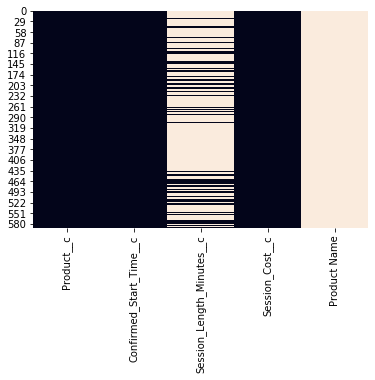

In [46]:
sns.heatmap(session.isnull(), cbar=False)

In [47]:
session.head()

,Product__c,Confirmed_Start_Time__c,Session_Length_Minutes__c,Session_Cost__c,Product Name
0,nan,2020-08-04T12:00:00.000+0000,NaN,0.0,NaN
1,nan,2020-08-05T01:00:00.000+0000,NaN,4950.0,NaN
2,nan,2020-08-27T19:30:00.000+0000,NaN,0.0,NaN
3,nan,2020-08-27T15:00:00.000+0000,NaN,0.0,NaN
4,nan,2020-08-26T16:00:00.000+0000,NaN,0.0,NaN


In [48]:
session['Product Name'].value_counts()

Series([], Name: Product Name, dtype: int64)

## Objective #3

What is the average Booking value of Opportunities with sessions sold since July?

In [49]:
book_df = opps_df.copy()

book_df = book_df[['Id','StageName','Amount', 'IsWon',\
'Confirmed_Session_Date_Time__c','Budget_Confirmed__c']]

book_df

,Id,StageName,Amount,IsWon,Confirmed_Session_Date_Time__c,Budget_Confirmed__c
0,0062M00000kbwE9QAI,Demo,35000.0,False,NaN,False
1,0062M00000kbwPbQAI,Closed Won,74500.0,True,NaN,False
2,0062M00000kbwbXQAQ,Closed Lost,9150.0,False,2020-07-09T16:00:00.000+0000,False
3,0062M00000kbwdYQAQ,Closed Lost,234500.0,False,NaN,False
4,0062M00000kbwv8QAA,Closed Lost,7090.0,False,2020-07-14T23:00:00.000+0000,False
...,...,...,...,...,...,...
716,0062M00000kw8LVQAY,Recommendation,NaN,False,NaN,False
717,0062M00000kw8lvQAA,Recommendation,3500.0,False,NaN,False
718,0062M00000kw8mtQAA,Discovery,3500.0,False,NaN,False
719,0062M00000kw9SvQAI,Discovery,3500.0,False,NaN,False


In [50]:
# Remove null values in Confirmed_Session_Date_Time__c

zero_dict = {0: np.nan}
book_df['Confirmed_Session_Date_Time__c'].replace(zero_dict, inplace = True)
book_df.dropna(inplace = True)
book_df.shape

(10, 6)

In [51]:
book_df.groupby([book_df.StageName == 'Closed Won'])['Amount'].mean().round(2)

StageName
False    10598.33
True     13487.50
Name: Amount, dtype: float64

In [52]:
book_df

,Id,StageName,Amount,IsWon,Confirmed_Session_Date_Time__c,Budget_Confirmed__c
2,0062M00000kbwbXQAQ,Closed Lost,9150.0,False,2020-07-09T16:00:00.000+0000,False
4,0062M00000kbwv8QAA,Closed Lost,7090.0,False,2020-07-14T23:00:00.000+0000,False
19,0062M00000kc2WUQAY,Closed Lost,10000.0,False,2020-08-03T19:00:00.000+0000,False
20,0062M00000kc44SQAQ,Closed Won,10600.0,True,2020-08-04T19:00:00.000+0000,False
22,0062M00000kc51NQAQ,Closed Won,10000.0,True,2020-07-21T23:00:00.000+0000,False
24,0062M00000kc6E3QAI,Closed Won,10500.0,True,2020-07-13T20:00:00.000+0000,False
47,0062M00000kcCkqQAE,Closed Lost,12000.0,False,2020-07-14T02:00:00.000+0000,False
54,0062M00000kcF70QAE,Closed Won,22850.0,True,2020-07-17T00:00:00.000+0000,False
62,0062M00000kcHIrQAM,Closed Lost,10350.0,False,2020-08-20T16:00:00.000+0000,False
64,0062M00000kcHmrQAE,Closed Lost,15000.0,False,2020-08-04T19:00:00.000+0000,False


# MySQL Connection

In [60]:
db_user = os.getenv('db_user')
db_passwd = os.getenv('db_passwd')

In [65]:
# Create a database
mycursor = mydb.cursor()

# This line is commented out because it only needs to be run once
# mycursor.execute("CREATE DATABASE BIntelligenceDB")

In [63]:
mydb = mysql.connector.connect(host='localhost',\
                              user=db_user,\
                              passwd=db_passwd\
                              ,database='BIntelligenceDB'\
                              )
                               
print(mydb)

In [67]:
mycursor.execute("SHOW DATABASES")

for db in mycursor:
    print(db)

('BIntelligenceDB',)
('classicmodels',)
('employees',)
('information_schema',)
('mysql',)
('performance_schema',)
('Sales',)
('sys',)
('testdb',)
